In [52]:
## Michael Stern's Jupyter notebook for Berkeley AI/ML Course
## Assignment 20.1 Capstone Project Exploratory Data Analysis


In [53]:
# import the dataset
# Data source: 
# https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi%3A10.7910%2FDVN%2FJQGLHX&version=&q=&fileAccess=&fileTag=&fileSortField=&fileSortOrder=&tagPresort=true&folderPresort=true

import pandas as pd

fa_df = pd.read_csv('ppd_stage1_stage2.txt', sep='\t')

print(fa_df.head())


  donor country_code_WB countryname_WB              region  startyear  \
0  AfDB             AGO         Angola  Sub-Saharan Africa     2003.0   
1  AfDB             AGO         Angola  Sub-Saharan Africa     2008.0   
2  AfDB             AGO         Angola  Sub-Saharan Africa     2011.0   
3  AfDB             AGO         Angola  Sub-Saharan Africa     2014.0   
4  AfDB             BDI        Burundi                 NaN     1974.0   

   original_overall_rating  six_overall_rating  countryiddummy  donoriddummy  \
0                 2.707317            4.060976             4.0           1.0   
1                 2.940000            4.410000             4.0           1.0   
2                 3.300000            4.950000             4.0           1.0   
3                 3.000000            4.500000             4.0           1.0   
4                      NaN                 NaN            19.0           1.0   

   regioniddummy  ...  afdb_projectamount_usd  pseudo_sector  \
0            7.0

/tmp/ipykernel_121/537298403.py:7: DtypeWarning: Columns (87,88,89,90,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  fa_df = pd.read_csv('ppd_stage1_stage2.txt', sep='\t')


In [54]:
fa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21788 entries, 0 to 21787
Data columns (total 93 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   donor                        21788 non-null  object 
 1   country_code_WB              20475 non-null  object 
 2   countryname_WB               21252 non-null  object 
 3   region                       20369 non-null  object 
 4   startyear                    21684 non-null  float64
 5   original_overall_rating      20689 non-null  float64
 6   six_overall_rating           20686 non-null  float64
 7   countryiddummy               20475 non-null  float64
 8   donoriddummy                 21788 non-null  float64
 9   regioniddummy                20369 non-null  float64
 10  donor_country                20475 non-null  float64
 11  region_donor                 20302 non-null  float64
 12  countrytrend                 20375 non-null  float64
 13  donortrend      

In [55]:
# delete lagged variables to simplify analysis
# and to account for participant's lack of expertise in how to use these variables

# define sequence of letters to drop for columns starting with "lag"
prefix_to_drop1 = 'lag'

# Identify columns to drop using list comprehension
columns_to_drop1 = [col for col in fa_df.columns if col.startswith(prefix_to_drop1)]

# Drop the identified columns
fa_df = fa_df.drop(columns = columns_to_drop1)

# define sequence of letters to drop for columns starting with "lead"
prefix_to_drop2 = 'lead'

# Identify columns to drop using list comprehension
columns_to_drop2 = [col for col in fa_df.columns if col.startswith(prefix_to_drop2)]

# Drop the identified columns
fa_df = fa_df.drop(columns = columns_to_drop2)

fa_df.info()
# dropped 44 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21788 entries, 0 to 21787
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   donor                        21788 non-null  object 
 1   country_code_WB              20475 non-null  object 
 2   countryname_WB               21252 non-null  object 
 3   region                       20369 non-null  object 
 4   startyear                    21684 non-null  float64
 5   original_overall_rating      20689 non-null  float64
 6   six_overall_rating           20686 non-null  float64
 7   countryiddummy               20475 non-null  float64
 8   donoriddummy                 21788 non-null  float64
 9   regioniddummy                20369 non-null  float64
 10  donor_country                20475 non-null  float64
 11  region_donor                 20302 non-null  float64
 12  countrytrend                 20375 non-null  float64
 13  donortrend      

In [56]:
# delete null values for the target variable six_overall_rating

fa_df.dropna(subset=['six_overall_rating'], inplace = True)
fa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20686 entries, 0 to 21786
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   donor                        20686 non-null  object 
 1   country_code_WB              19945 non-null  object 
 2   countryname_WB               20686 non-null  object 
 3   region                       19892 non-null  object 
 4   startyear                    20602 non-null  float64
 5   original_overall_rating      20686 non-null  float64
 6   six_overall_rating           20686 non-null  float64
 7   countryiddummy               19945 non-null  float64
 8   donoriddummy                 20686 non-null  float64
 9   regioniddummy                19892 non-null  float64
 10  donor_country                19945 non-null  float64
 11  region_donor                 19826 non-null  float64
 12  countrytrend                 19864 non-null  float64
 13  donortrend           

In [57]:
# Combine columns that capture project sizes for different donors
# into a single project_size column.

# # 'id_vars' specifies columns to keep as identifiers
# # 'value_vars' specifies the columns to combine
# fa_df = fa_df.melt(
#     id_vars=['donor'],
#     value_vars=['asdb_approvedamount', 'jica_projectsize', 'kfw_projectsize',
#                 'giz_projectsize', 'ifad_LoanAmount', 'gfatm_grantdisbursedamount',
#                 'gef_grant_mil_usd', 'wb_lendingprojectcost', 'afdb_projectamount_usd'],
#     var_name='project_size_individual', # new column containing the original column headers
#     value_name='project_size_combined'           # new column containing the numeric values
# )

# Define the columns that contain the project size data
# size_cols = ['asdb_approvedamount', 'jica_projectsize', 'kfw_projectsize',
#              'giz_projectsize', 'ifad_LoanAmount', 'gfatm_grantdisbursedamount',
#             'gef_grant_mil_usd', 'wb_lendingprojectcost', 'afdb_projectamount_usd']

# # Sum the columns row-wise (axis=1) to get the single size value
# fa_df['Project_Size'] = fa_df[size_cols].sum(axis=1)

# # Drop the original size columns
# fa_df = fa_df.drop(columns=size_cols)

# fa_df.info()

In [58]:
# Recode classification into binary (dummy) variables

# drop null values from classification
fa_df.dropna(subset=['classification'], inplace = True)
fa_df.value_counts('classification')
# drop rows where classification is '.'
col_to_filter = 'classification'
value_to_drop = ['.']
mask = ~fa_df[col_to_filter].isin(value_to_drop)
fa_df = fa_df[mask]

# Create new binary columns from the 'classification' column
classification_dummies = pd.get_dummies(fa_df['classification'], prefix = 'recipient_loan_type').astype(int)

# Add the new binary columns back to fa_df
fa_df = pd.concat([fa_df, classification_dummies], axis = 1)

# Drop the original categorical 'classification' column
fa_df = fa_df.drop('classification', axis=1)

fa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19431 entries, 0 to 21585
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   donor                        19431 non-null  object 
 1   country_code_WB              19431 non-null  object 
 2   countryname_WB               19431 non-null  object 
 3   region                       19427 non-null  object 
 4   startyear                    19431 non-null  float64
 5   original_overall_rating      19431 non-null  float64
 6   six_overall_rating           19431 non-null  float64
 7   countryiddummy               19431 non-null  float64
 8   donoriddummy                 19431 non-null  float64
 9   regioniddummy                19427 non-null  float64
 10  donor_country                19431 non-null  float64
 11  region_donor                 19427 non-null  float64
 12  countrytrend                 19431 non-null  float64
 13  donortrend           

In [59]:
# drop variables not needed as input for ML models
# original_overall_rating (using six_overall_rating as target variable since it is standardized
# 'pseudo_sector' (project sector information captured by 'wb_sector_board')
# 'crs_purpose_sector' (project sector information captured by 'wb_sectorboard')
# dfat_InvestmentPriorityArea (captured by 'wb_sector_board')
# ifad_Subsector (captured by 'wb_sector_board')
# gfatm_project_component (captured by 'wb_sector_board')
# wb_sectorboard (captured by 'wb_sector_board')
# gef_FocalArea (captured by "wb_sector_board')
# afdb_SectorNames (captured by "wb_sector_board')
# startyear (using 'project_duration' to capture info about project timing)


fa_df = fa_df.drop(columns = ['original_overall_rating', 'pseudo_sector', 'crs_purpose_sector', 'dfat_InvestmentPriorityArea', 
                              'ifad_Subsector', 'gfatm_project_component', 'wb_sectorboard',
                              'gef_FocalArea', 'afdb_SectorNames', 'startyear'])

fa_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19431 entries, 0 to 21585
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   donor                       19431 non-null  object 
 1   country_code_WB             19431 non-null  object 
 2   countryname_WB              19431 non-null  object 
 3   region                      19427 non-null  object 
 4   six_overall_rating          19431 non-null  float64
 5   countryiddummy              19431 non-null  float64
 6   donoriddummy                19431 non-null  float64
 7   regioniddummy               19427 non-null  float64
 8   donor_country               19431 non-null  float64
 9   region_donor                19427 non-null  float64
 10  countrytrend                19431 non-null  float64
 11  donortrend                  19431 non-null  float64
 12  gdp_growth                  18830 non-null  float64
 13  oda_to_gni                  18029 no

In [60]:
# Drop project size columns specific to a donor
# 'projectsize_original' captures all the project size information required

fa_df = fa_df.drop(columns = ['asdb_approvedamount', 'jica_projectsize', 'kfw_projectsize',
                              'giz_projectsize', 'ifad_LoanAmount', 'gfatm_grantdisbursedamount',
                              'gef_grant_mil_usd', 'wb_lendingprojectcost', 'afdb_projectamount_usd']) 

fa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19431 entries, 0 to 21585
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   donor                   19431 non-null  object 
 1   country_code_WB         19431 non-null  object 
 2   countryname_WB          19431 non-null  object 
 3   region                  19427 non-null  object 
 4   six_overall_rating      19431 non-null  float64
 5   countryiddummy          19431 non-null  float64
 6   donoriddummy            19431 non-null  float64
 7   regioniddummy           19427 non-null  float64
 8   donor_country           19431 non-null  float64
 9   region_donor            19427 non-null  float64
 10  countrytrend            19431 non-null  float64
 11  donortrend              19431 non-null  float64
 12  gdp_growth              18830 non-null  float64
 13  oda_to_gni              18029 non-null  float64
 14  gdp_percapita           18840 non-null  flo

In [61]:
# # drop variables that if feature engineered would create large sparse matrix

# fa_df = fa_df.drop(columns = ['countryiddummy',	'donoriddummy',	'regioniddummy',
#                               'donor_country', 'region_donor', 'countrytrend', 'donortrend'])

# fa_df.info()


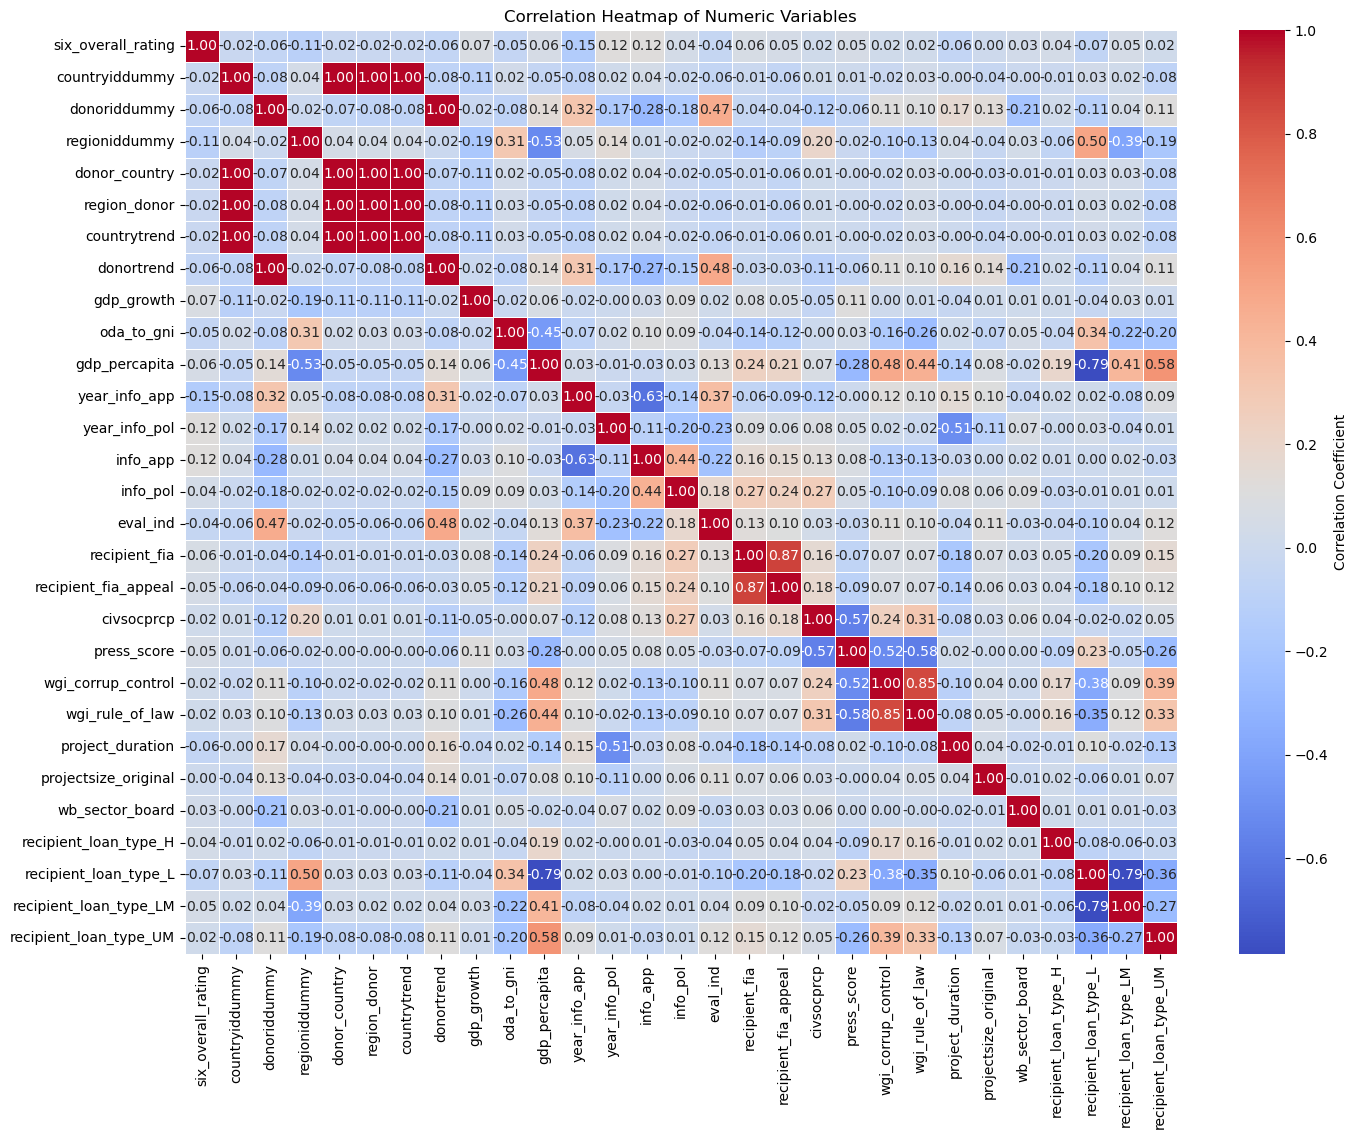

<Figure size 640x480 with 0 Axes>

In [62]:
# correlation heatmap to explore relationships between variables

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to include only numeric data types
numeric_fa_df = fa_df.select_dtypes(include = np.number)

correlation_matrix = numeric_fa_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,        # Show the correlation values on the map
    fmt=".2f",         # Format the values to two decimal places
    cmap='coolwarm',   # Use a diverging color palette
    linewidths=.5,     
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()
plt.savefig('correlation_heatmap.jpg', dpi = 300)

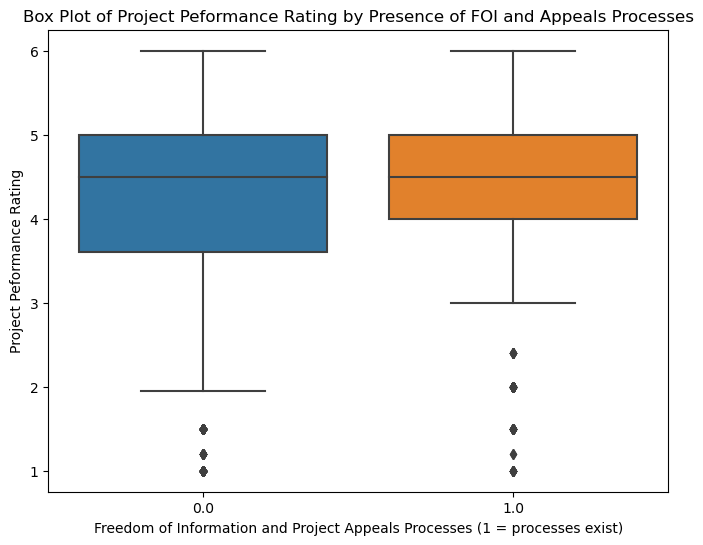

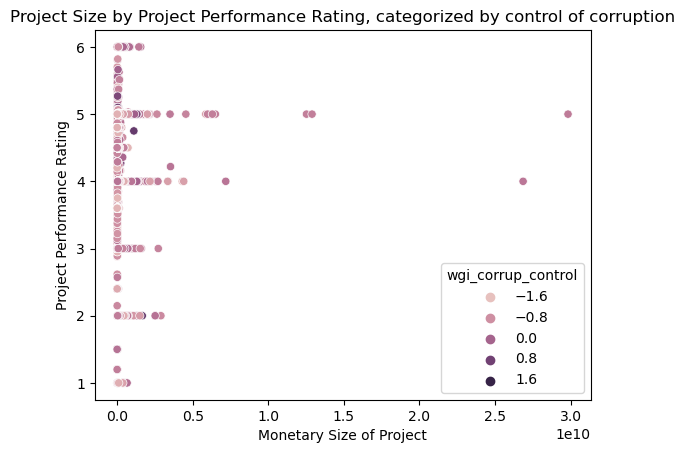

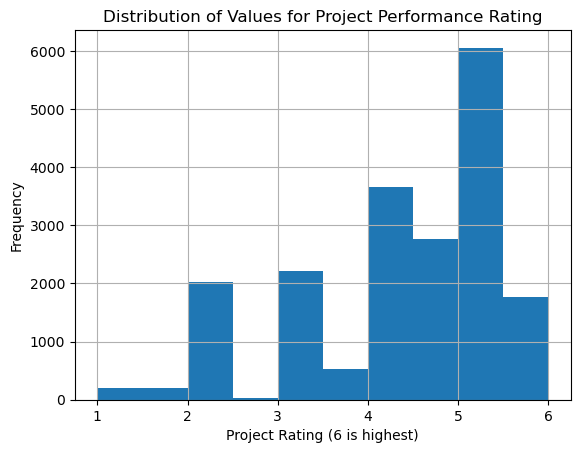

The mean of performance rating is: 4.197578424877773


<Figure size 640x480 with 0 Axes>

In [63]:
# plots to examine how features potentially influence the target "six_overall_rating

plt.figure(figsize=(8, 6))
sns.boxplot(x = 'recipient_fia_appeal', y = 'six_overall_rating', data = fa_df)
plt.title('Box Plot of Project Peformance Rating by Presence of FOI and Appeals Processes')
plt.xlabel('Freedom of Information and Project Appeals Processes (1 = processes exist)')
plt.ylabel('Project Peformance Rating')
plt.show()
# indication that having an FOI mechanism and appeals mechanism associated with higher ratings on avg

sns.scatterplot(x = 'projectsize_original', y = 'six_overall_rating', data= fa_df, hue = 'wgi_corrup_control')

plt.title('Project Size by Project Performance Rating, categorized by control of corruption')
plt.xlabel('Monetary Size of Project')
plt.ylabel('Project Performance Rating')

plt.show()
plt.savefig('scatter_projperf_FOI.jpg', dpi=300)


fa_df['six_overall_rating'].hist(bins = 10)
plt.title('Distribution of Values for Project Performance Rating')
plt.xlabel('Project Rating (6 is highest)')
plt.ylabel('Frequency')

# Display the histogram
plt.show()
plt.savefig('project_performance_histogram.jpg', dpi=300)


mean_rating = fa_df['six_overall_rating'].mean()

print(f"The mean of performance rating is: {mean_rating}")

In [64]:
# Linear Regression as baseline model
# Treats target variable 'six_overall_rating' as a de facto continuous variable

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# drop null row values
fa_df.dropna(inplace = True)

# Columns for features and target
X = fa_df[['gdp_growth', 'oda_to_gni', 'gdp_percapita', 'info_pol', 'eval_ind', 'recipient_fia',
        'recipient_fia_appeal', 'civsocprcp', 'press_score', 'wgi_corrup_control', 
        'wgi_rule_of_law', 'project_duration', 'projectsize_original', 'recipient_loan_type_H', 
        'recipient_loan_type_L', 'recipient_loan_type_LM', 'recipient_loan_type_UM']] # features
y = fa_df['six_overall_rating'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit Linear Regression model:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model.
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")



Mean Squared Error: 1.041951735621043
Coefficients: [ 6.15709564e-03 -3.93222413e-03 -2.11409521e-02 -1.93904765e-01
 -4.11922451e-01  1.28569662e-01 -9.65550095e-02  3.71316597e-03
  7.85649518e-03  1.40701468e-01  1.77474562e-01 -1.10619051e-04
  9.25242057e-12  3.25547462e-01 -1.31289890e-01 -9.11497182e-02
 -1.03107854e-01]
Intercept: 4.871101740565064
